<h1>Algoritmo DFS</h1><br>
<b><i>El algoritmo de Depth First Search nos permitirá validar si se puede acceder a todos los nodos</i></b>
    <p>Vamos a iterar por todos los casilleros del tablero para ver si ninguno ha sido completamente cerrado por las barreras (cuando hayan). Es decir, vamos a contar que solo hay un componente en el grafo, representado por el tablero</p>
    <p>Esto gracias <code>DFS</code> que nos permitirá recorrer los nodos hasta que no se pueda mover a otro lado. Realizaremos esta operacion tantas veces sea posible y llevaremos un contador de dichas veces para contar las componentes del grafo. Debería ser solo una para que el tablero sea valido</p>


<h2>Definición de recursos e input</h2><br>
<p>Para usar DFS usaremos una matriz de nodos visitados y una matriz que almacenará los datos del tablero. <br>
El input de datos constará un numero de filas y columnas del tablero y de una matriz de <code>#</code> y <code>.</code> tal como la que se muestra en el output, donde <code>5</code> y <code>5</code> son el numero de filas y columnas.</p>
<p>
    La funcion <code>valid()</code> se encargará de retornar si el punto dado está en los límites, no ha sido visitado aún según la matriz de visitados y el valor de el tablero en ese punto no es una pared.
</p>

In [ ]:
h, w = [int(x) for x in input().split()]
board = []
for i in range(h):
    board.append(list(input()))
vis = [[False]*w]*w
directions = [(1,0),(-1,0),(0,1),(0,-1)]

def valid(r,c):
    return 0 <= r and r < h and 0 <= c and c < w and board[r][c] != '#' \
           and not vis[r][c]

5 5
#####
#.#.#
#.###
#...#
#####


<h2>El algoritmo principal</h2>
<p>
El <code>DFS</code> va a iterar por todos los nodos partiendo del nodo que se se le dé. A partir de ahí, recorrerá todos los nodos adyacentes, en este caso, las posiciones adyacentes serán definidas por el vector de <code>directions</code> y para evaluar si se debe o no recorrer el nodo adyacente, se usará la funcion <code>valid()</code> explicada anteriormente.
</p>
<p>En los <code>for</code> fuera de <code>dfs()</code>, crearemos un contador de componentes. Como <code>dfs()</code> recorrerá todos los nodos que estén a su alcance, podemos asumir que dejará como 'visitados' a todos los nodos a los que pueda acceder, y para que el tablero de Quoridor sea valido, tendría que poder acceder a todos los casilleros. En caso el contador de componentes llegue a ser más de 1, se puede decir que el tablero es invalido y no sería necesario seguir usando <code>dfs()</code> en los demás componentes</p>

In [ ]:
def dfs(r,c):
    vis[r][c] = True
    for d in directions:
        nr, nc = r+d[0], c+d[1]
        if valid(nr,nc):
            dfs(nr,nc)

c = 0
flag = False
for i in range(h):
    for j in range(w):
        if valid(i,j):
            dfs(i,j)
            Flag = True
            c+=1

if c > 1:
    print("Invalid board")


Invalid board


<h2>Conclusiones</h2><br>
<p>    
<code>El espacio de búsqueda de DFS</code>en este caso sería el tamaño del tablero. En el caso del ejemplo vendría a ser $40$, es decir $O(m×n)$ debido a que la complejidad de BFS es $O(V+E)$ </p>
<p>
   Sin embargo como queremos (por ahora) sí o sí recorrer todos los casilleros del tablero, podiamos modificar la función para recorrer llamando al <code>dfs()</code> solo una vez en la primera posición disponible y, si desde allí no logra visitar todos los nodos, es porque el tablero es inválido.</p>
<p>
        En el Quoridor que vamos a desarrollar, se podrá ingresar la cantidad de <code>filas</code> y <code>columnas</code> que tendrá el tablero, por lo que usar <code>dfs()</code> para validar si éste es valido o no en cada turno, sería algo ineficiente. Quizás podemos llevar el control de los componentes en tiempo real conforme se van agregando las barreras o conocer cuáles son los puntos exactos en los que las barreras son inválidas y no usar <code>DFS</code> tan seguido.

</p>



<h2>Resolucion del problema con DFS</h2>

<p>En la siguiente demostración se muestra la función que usamos para comprobar si se puede colocar una barrera en el punto <code>r,c</code> brindado. </p>
<p>Se realizará la misma operación que en el <code>DFS</code> mostrado arriba, solo que se retornará si la cantidad de los componentes del grafo es igual a $1$. Es decir, si se pueden acceder a todos los casilleros. </p>

In [7]:
def valid_block(board, r, c):
    board[r][c] = '#'
    dx = [1,-1,0,0]
    dy = [0,0,1,-1]
    n, m = len(board), len(board[0])

    vis = [[False for i in range(m)] for j in range(n)]

    def valid(row, col):
        return (row >= 0) and (row < n) and (col >= 0) and (col < m) \
            and (board[row][col] != '#') and (not vis[row][col])

    def dfs(row, col):
        vis[row][col] = True
        for i in range(4):
            nx = row + dx[i]
            ny = col + dy[i]
            if valid(nx, ny):
                dfs(nx, ny)

    rooms = 0
    for i in range(n):
        for j in range(m):
            if (board[i][j] != '#') and (not vis[i][j]):
                rooms += 1
                dfs(i, j)
    
    board[r][c] = ' '
    return rooms == 1

## Medición de tiempos

<h4>Librerias a usar:</h4>

In [8]:
import time
import numpy as np
from matplotlib import pyplot as plt

<h4>Generar matriz aleatoria</h4>

In [9]:
def get_random_matrix(n):
    mat = np.where(np.random.randint(low = -n, high = n, size=(n,n)) > 0, '#', ' ')
    mat[:,[0,-1]] = mat[[0,-1]] = '#'
    return mat

<h4>Mostrar grafico con los tiempos:</h4>

10 values took 0.0s
366 values took 0.384s
722 values took 1.278s
1079 values took 3.251s
1435 values took 5.59s
1792 values took 8.322s
2148 values took 11.111s
2505 values took 15.627s
2861 values took 20.612s
3217 values took 26.279s
3574 values took 33.316s
3930 values took 40.276s
4287 values took 41.477s
4643 values took 49.288s
5000 values took 57.91s


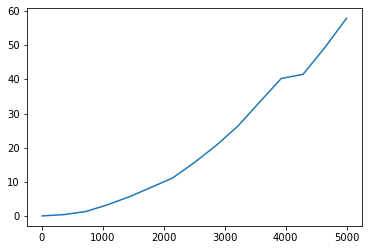

In [13]:
def show_graph():
  
    tests = np.linspace(10,5000,15,dtype=np.int32)
    results = []
    time_measured = []
    for n in tests:
        print(n, "values took", end = " ")
        random_mat = get_random_matrix(n)
        rpx,rpy = np.random.randint(low = 1, high = n-1, size=2)
        
        start = time.time()
        results.append(valid_block(random_mat, rpx, rpy))
        end = time.time()
        time_measured.append(end-start)
        print(f"{np.round(end-start, decimals=3)}s")
    plt.plot(tests, time_measured)
    
    
    plt.legend(('DFS'), prop = {'size': 10}, loc='upper left')

    plt.xlabel('Tamaño de NxN')
    plt.ylabel('Tiempo')
    plt.title('Representacion de tiempos')
    plt.show()

show_graph()
